# Group Project

In this workshop you will be working in groups to solve a problem.

There is a choice of three briefs which you can read below. Whichever one you choose, you will need to clean and explore the data before building a suitable model to fulfil the brief. You will be expected to iterate on your model as well as write a report for a non-technical stakeholder explaining how the model works, what its outputs mean and how reliable it is.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_curve, roc_auc_score

## Brief 1: Equitable Pay

Hogan-Nash-Hall is a major recruitment firm that is launching an internal review into its pay structures. Explore the data to find what historically has driven salaries and answer the following questions.

<ol>
    <li> What are the average salaries across genders? </li>
    <li> Are salaries consistent across race? </li>
    <li> What factors are most important in determining salary?</li>
    <li> What factors are most important in determining whether someone will be terminated? </li>
    <li> What recommendations would you give to this company? </li>
</ol>

<a href='https://www.kaggle.com/datasets/rhuebner/human-resources-data-set'>Documentation.</a>

In [2]:
hr = pd.read_csv('HR_dataset.csv')

In [3]:
hr.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [5]:
# Check for null values
hr.isnull().sum()


Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [6]:
hr.isnull().sum()
# We discovered nulls only in the DateofTermination and ManagerID columns

# Check for duplicates
hr.duplicated().sum()
# No duplicates

0

In [7]:
# What are the average salaries across genders?
salariesByGender = pd.DataFrame(hr.groupby('GenderID')['Salary'].mean())
# Change index values to 'Male' and 'Female'
salariesByGender.index = ['Male', 'Female']

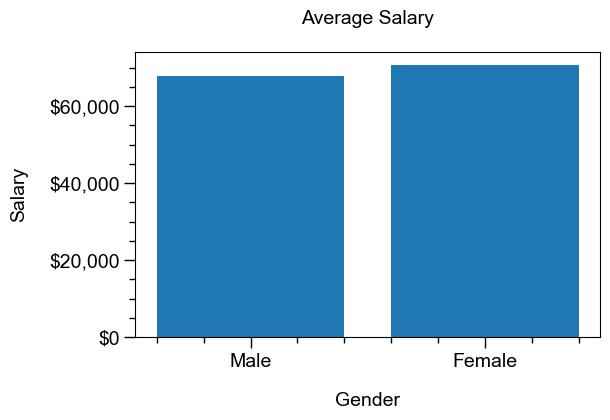

In [8]:
# Plot a bar chart
plt.bar(salariesByGender.index, salariesByGender['Salary'])
# Format y-axis to show comma and prefix dollar sign
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
plt.title('Average Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

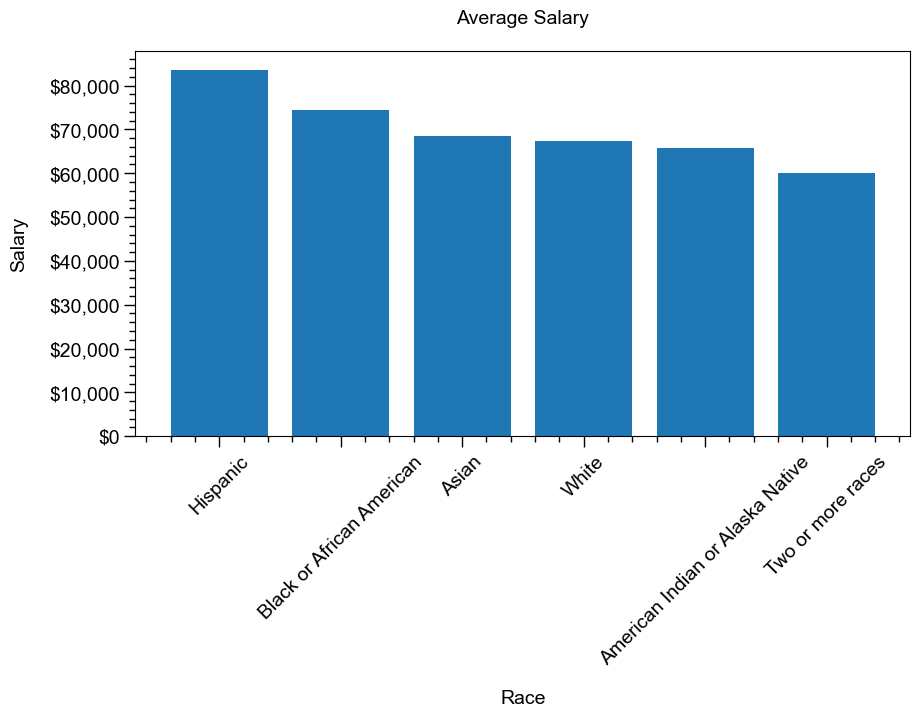

In [9]:
# Are salaries consistent across race?
salariesByRace = pd.DataFrame(hr.groupby('RaceDesc')['Salary'].mean())
# Sort values in descending order
salariesByRace = salariesByRace.sort_values(by='Salary', ascending=False)

plt.figure(figsize=(10, 5))
# Plot a bar chart
plt.bar(salariesByRace.index, salariesByRace['Salary'])
# Format y-axis to show comma and prefix dollar sign
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
plt.title('Average Salary')
plt.xlabel('Race')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

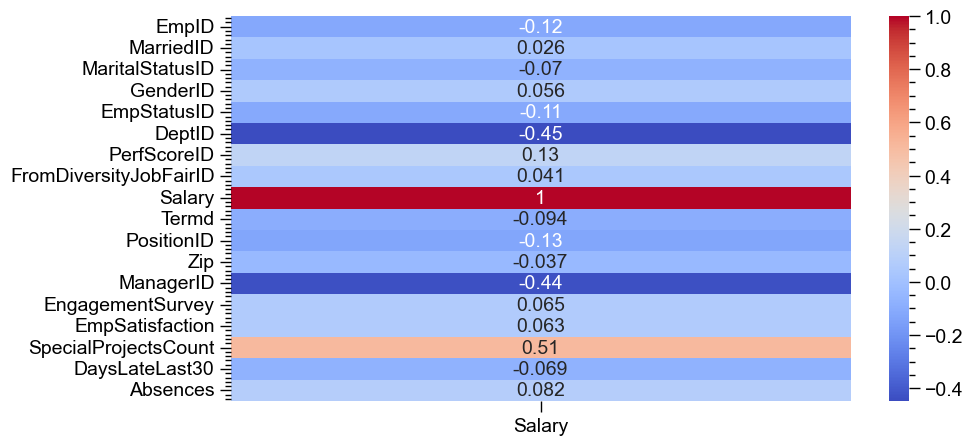

In [10]:
# Correlation matrix
corr = hr.corr()

# Plot a heatmap for the correlation matrix for Salary
plt.figure(figsize=(10, 5))
sns.heatmap(corr[['Salary']], annot=True, cmap='coolwarm')
plt.show()

## Brief 2: Life Expectancy

The World Health Organisation is investigating factors which link to life expectancy with a view to making recommendations on what countries can do to imrprove their citezins life quality of life. Use the data below to answer the following questions:

<ol>
    <li> To what extent do the predictors in this dataset correlate with life expectancy?</li>
    <li> How do infant and adult mortality rates affect life expectancy?</li>
    <li> What is the impact of schooling on life expectancy? </li>
    <li> What is the relationship between alcohol consumption and life expectancy?</li>
    <li> What is the impact of immunization coverage on life expectancy?</li>
    <li> What factors should the WHO prioritize for improving life expectancy of developing countries?</li>
</ol>
    

<a href='https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who'>Documentation.</a>

In [11]:
le = pd.read_csv('life_expectancy_data.csv')

In [12]:
le

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


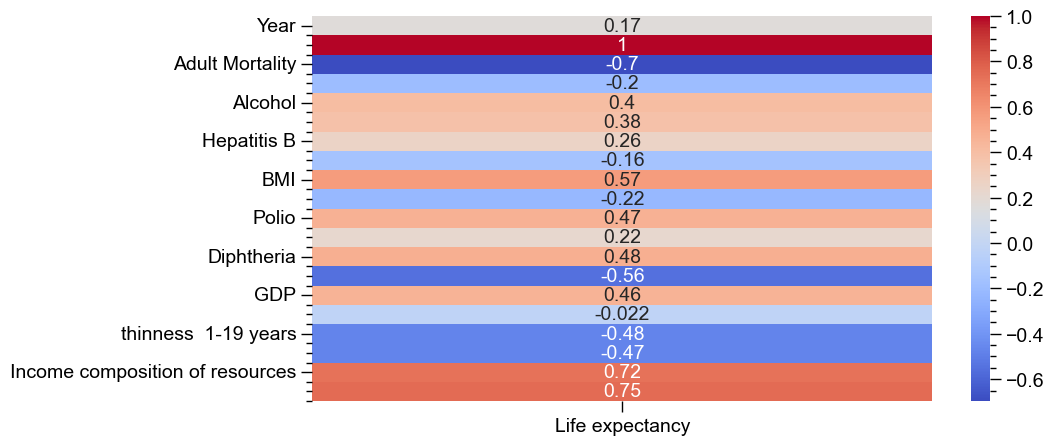

In [13]:
corr = le.corr()

# Plot a heatmap for the correlation matrix for Life expectancy
plt.figure(figsize=(10, 5))
sns.heatmap(corr[['Life expectancy']], annot=True, cmap='coolwarm')
plt.show()

## Brief 3: Credit Card Approvals

Credit score cards are a common way of assessing risk in the financial industry. It checks personal information and other data submitted by applicants to predict if they will make defaults in the future. However, these scores are based on historical data and may lose their predictive power if there are large changes in the market (e.g. due to changes in the market). More than ever lenders are looking to predict if someone will be a 'good' or 'bad' client, use the data below to build a model that will predict this as well as report which reasons would lead to someone being rejected.

<a href='https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction'>Documentation.</a>

In [14]:
app_df = pd.read_csv('application_record.csv')
cred_df = pd.read_csv('credit_record.csv')